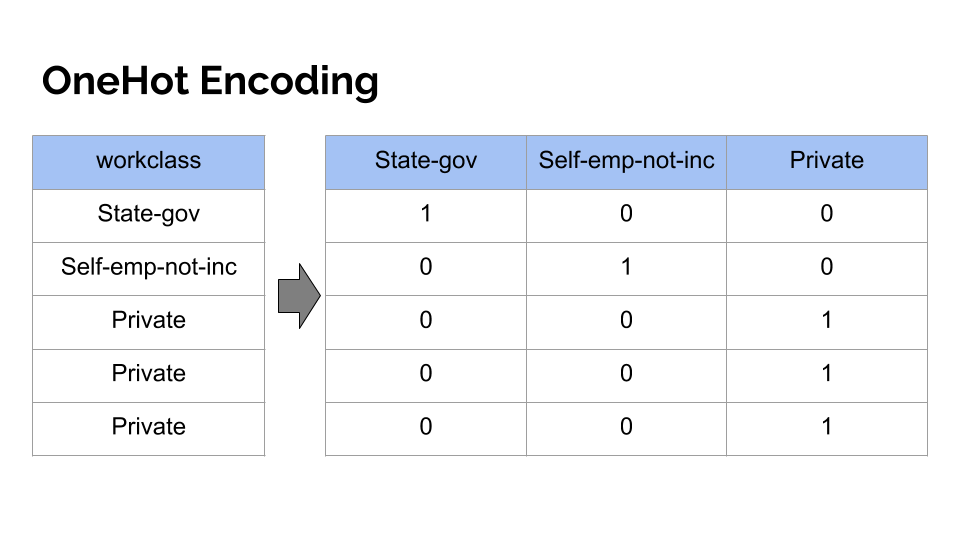

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('cars.csv')

In [2]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [5]:
print(df.isnull().sum())

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64


In [10]:
print(df['owner'].value_counts())
print(df['fuel'].value_counts())

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64


In [11]:
print(df['brand'].value_counts())

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64


# Now apply OneHot encoding with pandas

In [14]:
pd.get_dummies(df,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


# K-1 OneHot Encoding

In [15]:
#K-1 means we have drop the two column for this table. for reasone this step is ""Multicolinirity"".

pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


# OneHotEncoding using Sklearn

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.3,random_state=2)

In [17]:
X_train.head()

,brand,km_driven,fuel,owner
6310,Maruti,131111,Diesel,First Owner
2219,Maruti,29000,Petrol,First Owner
4600,Maruti,85000,Diesel,Second Owner
2167,Maruti,90000,Petrol,Second Owner
5272,Hyundai,80000,Diesel,Second Owner


In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [20]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])
X_test_new = ohe.fit_transform(X_test[['fuel','owner']])

In [22]:
print(X_train_new.shape)
print(X_test_new.shape)

(5689, 7)
(2439, 7)


### Now merge X_train_new and X_train table

In [23]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Maruti', 131111, 1, ..., 0, 0, 0],
       ['Maruti', 29000, 0, ..., 0, 0, 0],
       ['Maruti', 85000, 1, ..., 1, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

# Now apply OneHot catagories cloumn(Brand)

In [24]:
counts = df['brand'].value_counts()

In [26]:
df['brand'].nunique()
threshold = 100

In [27]:
repl = counts[counts <= threshold].index

In [29]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).sample(50)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
5299,0,0,0,0,0,0,0,0,0,1,0,0,0
2993,0,0,0,0,0,1,0,0,0,0,0,0,0
2871,0,0,0,0,1,0,0,0,0,0,0,0,0
1302,0,0,0,0,0,0,0,0,0,1,0,0,0
1945,0,0,0,0,0,0,1,0,0,0,0,0,0
7770,0,0,0,0,1,0,0,0,0,0,0,0,0
3411,0,0,0,0,0,0,0,0,0,1,0,0,0
7757,1,0,0,0,0,0,0,0,0,0,0,0,0
2359,0,0,1,0,0,0,0,0,0,0,0,0,0
5442,0,0,1,0,0,0,0,0,0,0,0,0,0


## What is Multi-Collinearity?
### When the explanatory variables which are assumed to be independent of each other are revealed to be closely related to each other, this correlation is referred to as collinearity. When this correlation is observed for two or more explanatory variables, it is known multi-collinearity.
### Multi-collinearity is particularly undesirable because it impacts the interpretability of linear regression models. Linear regression model not only help establish the presence/absence of a relationship between the response and explanatory variables, it helps identify the individual effect of each explanatory variables on the response variable.